In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imports

In [ ]:
! pip install "transformers" "pytorch-lightning"

     |████████████████████████████████| 4.0 MB 6.2 MB/s 
     |████████████████████████████████| 582 kB 29.7 MB/s 
     |████████████████████████████████| 895 kB 38.6 MB/s 
     |████████████████████████████████| 6.6 MB 43.7 MB/s 
     |████████████████████████████████| 77 kB 5.7 MB/s 
     |████████████████████████████████| 596 kB 39.0 MB/s 
     |████████████████████████████████| 408 kB 45.3 MB/s 
     |████████████████████████████████| 136 kB 41.5 MB/s 
     |████████████████████████████████| 1.1 MB 63.9 MB/s 
     |████████████████████████████████| 144 kB 56.8 MB/s 
     |████████████████████████████████| 94 kB 3.7 MB/s 
     |████████████████████████████████| 271 kB 56.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import json
import pandas as pd
import numpy as np
import time
import heapq

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
%matplotlib inline 
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn as nn

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# likes_path = "/content/drive/MyDrive/Tesi/easytour-likes-2022-03MAR-21.json"
# schede_path = "/content/drive/MyDrive/Tesi/easytour-schede-2022-03MAR-21.json"
# data_path = "/content/drive/MyDrive/Tesi/data.csv"

In [ ]:
likes_path = "/content/drive/MyDrive/Tesi/kuriu-likes-apr.json"
schede_path = "/content/drive/MyDrive/Tesi/kuriu-schede-apr.json"
data_path = "/content/drive/MyDrive/Tesi/data-APR.csv"

In [ ]:
df_schede = pd.read_json(schede_path)
df_likes = pd.read_json(likes_path)
data = pd.read_csv(data_path, encoding_errors='ignore')  

In [ ]:
categories = ["aria aperta", "cultura", "food", "sport", "tempo libero", "viaggi"]

In [ ]:
df_schede_fields = df_schede[["id","userId", "title", "description", "duration", "datePublishing", "creationDate", "counterUseful", "categories", "viewCounter"]]
df_likes_ids = df_likes[["id", "userId"]]

In [ ]:
df_schede

,id,userId,userName,documentType,title,description,locations,feature,duration,imageId,...,videoId,version,categories,media,shareType,status,lastUpdate,versionHistory,viewCounter,device
0,62355f98272ae5672fbc3ac7,632,Forestlife Adventure,experience,Spiagge selvagge a Phuket 🇹🇭,"Phuket, il paradiso per gli amanti del sole, d...",[{'photoReference': 'Aap_uEDKOn5xZw8whBhgYdkkO...,[],0,62355c31272ae5672fbc3a9d,...,None,2,[Viaggi],{'photos': [{'fileId': '62355c31272ae5672fbc3a...,SHARED,PUBLISHED,2022-03-19T04:44:08.475Z,"[{'version': 0, 'status': 'DRAFT', 'date': '20...",7,"{'deviceModel': 'Xiaomi Mi 9T', 'deviceOS': 'A..."
1,620aa536ff8ae67f37cafb06,442,lollo_cata,experience,Accarezzare le tigri,So che dietro queste cose c’è spesso del marci...,[{'photoReference': 'Aap_uEBCcOt7F8m6JNGvUZJOR...,[],10800000,620aa384ff8ae67f37cafaf9,...,None,4,[Viaggi],{'photos': [{'fileId': '620aa384ff8ae67f37cafa...,SHARED,PUBLISHED,2022-02-14T20:05:09.362Z,"[{'version': 0, 'status': 'DRAFT', 'date': '20...",419,"{'deviceModel': 'iPhone 13', 'deviceOS': 'iOS'..."
2,622c3b8ac992ca28f33c7f21,571,tiportoviaconme,experience,Escursione al tramonto a Pidurangala Rock,"Nel cuore dello Sri Lanka, nella zona centrale...",[{'photoReference': 'Aap_uECE8sfZDs45_vO9P4A-D...,[],0,622c39dfc992ca28f33c7ef6,...,None,2,[Aria aperta],{'photos': [{'fileId': '622c39dfc992ca28f33c7e...,SHARED,PUBLISHED,2022-03-12T06:19:54.777Z,"[{'version': 0, 'status': 'DRAFT', 'date': '20...",24,"{'deviceModel': 'OPPO CPH1907', 'deviceOS': 'A..."
3,620a90c8ff8ae67f37caf97f,530,GessicaM,experience,Koh Samui,Dopo il tour di Bangkok vi parlerò del belliss...,[{'photoReference': 'Aap_uECK2Ukxa6hFFTuOwt8N4...,[],3600000,620a9065ff8ae67f37caf956,...,620a90c5ff8ae67f37caf966,4,[Viaggi],{'photos': [{'fileId': '620a9065ff8ae67f37caf9...,SHARED,PUBLISHED,2022-02-16T15:15:51.025Z,"[{'version': 0, 'status': 'DRAFT', 'date': '20...",453,"{'deviceModel': 'iPhone SE (2nd generation)', ..."
4,622c398cc992ca28f33c7edd,571,tiportoviaconme,experience,"Visita al sito archeologico di Dambulla, Sri L...",Lo Sri Lanka è un paese molto vario e in poco ...,[{'photoReference': 'Aap_uEDcSmwdHtmkJrymQsTW0...,[],0,622c387ec992ca28f33c7e71,...,None,2,[Viaggi],{'photos': [{'fileId': '622c387ec992ca28f33c7e...,SHARED,PUBLISHED,2022-03-12T06:11:24.998Z,"[{'version': 0, 'status': 'DRAFT', 'date': '20...",12,"{'deviceModel': 'OPPO CPH1907', 'deviceOS': 'A..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4642,620c32db25398565dadb5867,570,gru1977,experience,"San Pedro, San Rafael, San Antonio 🇨🇴",San Pedro de los Milagros si trova a nord di M...,[{'photoReference': 'Aap_uECmYvam4yQCA0umcZcio...,[],194400000,620c31a325398565dadb5857,...,None,4,[Viaggi],{'photos': [{'fileId': '620c31a325398565dadb58...,SHARED,PUBLISHED,2022-03-02T16:28:46.733Z,"[{'version': 0, 'status': 'DRAFT', 'date': '20...",39,"{'deviceModel': 'samsung SM-A405FN', 'deviceOS..."
4643,6213b3460f41f86438b07d9c,429,Elle_,experience,"Machu Picchu, meraviglia del mondo","È l’alba, ma la realtà è che in questo viaggio...",[{'photoReference': 'Aap_uEASvi2g7Xd91-_ojmvmi...,[],21600000,6213b3000f41f86438b07cad,...,6213b3000f41f86438b07cb2,3,[Viaggi],{'photos': [{'fileId': '6213b3000f41f86438b07c...,SHARED,PUBLISHED,2022-03-01T12:33:30.729Z,"[{'version': 0, 'status': 'DRAFT', 'date': '20...",41,"{'deviceModel': 'iPhone 8', 'deviceOS': 'iOS',..."
4644,6207b9cdb1d0940f122580b7,570,gru1977,experience,Tutti i colori di Guatapé 🇨🇴,Guatapé è un’esplosione di colori. Non conosco...,[{'photoReference': 'Aap_uEABRi48_gTXe1ygfa22O...,[],72000000,6207b971b1d0940f122580af,...,None,4,[Viaggi],{'photos': [{'fileId': '6207b971b1d0940f122580...,SHARED,PUBLISHED,2022-03-02T16:27:29.935Z,"[{'version': 0, 'status': 'DRAFT', 'date': '20...",52,"{'deviceModel': 'samsung SM-A405FN', 'deviceOS..."
4645,61f6a3e3306802033034d576,536,Dierre,experience,Avventura in Ecuador - Quilotoa e Cotopaxi,Continuiamo il nostro viaggio sempre a bordo d...,[{'

In [ ]:
data

,id,userId,title,description,duration,datePublishing,creationDate,counterUseful,categories,viewCounter,aria aperta,cultura,food,sport,tempo libero,viaggi,duration_min,days
0,62355f98272ae5672fbc3ac7,632,"['spiaggia', 'phuket', 'thailand']","['phuket', 'paradiso', 'amant', 'sole', 'mare'...",0,2022-03-19T04:44:09.503Z,2022-03-19T04:44:08.000+00:00,0,['Viaggi'],7,0,0,0,0,0,1,0.0,31
1,620aa536ff8ae67f37cafb06,442,['tigr'],"['marcio', 'maltrattamento', 'animal', 'andar'...",10800000,2022-02-14T20:05:09.586Z,2022-02-14T18:53:42.000+00:00,0,['Viaggi'],419,0,0,0,0,0,1,180.0,63
2,622c3b8ac992ca28f33c7f21,571,"['escursion', 'tramonto', 'pidurangala', 'rock']","['cuor', 'sri', 'lanka', 'zona', 'interess', '...",0,2022-03-12T06:19:55.882Z,2022-03-12T06:19:54.000+00:00,1,['Aria aperta'],24,1,0,0,0,0,0,0.0,38
3,620a90c8ff8ae67f37caf97f,530,"['koh', 'samui']","['tour', 'bangkok', 'arcipelago', 'koh', 'samu...",3600000,2022-02-16T15:15:51.387Z,2022-02-14T17:26:32.000+00:00,0,['Viaggi'],453,0,0,0,0,0,1,60.0,63
4,622c398cc992ca28f33c7edd,571,"['visita', 'sito', 'dambulla', 'sri', 'lanka']","['sri', 'lanka', 'poter', 'mare', 'passeggiata...",0,2022-03-12T06:11:25.746Z,2022-03-12T06:11:24.000+00:00,1,['Viaggi'],12,0,0,0,0,0,1,0.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4642,620c32db25398565dadb5867,570,"['san', 'pedro', 'san', 'rafael', 'san', 'anto...","['san', 'pedro', 'de', 'lo', 'milagro', 'nord'...",194400000,2022-03-02T16:28:47.197Z,2022-02-15T23:10:19.000+00:00,0,['Viaggi'],39,0,0,0,0,0,1,3240.0,62
4643,6213b3460f41f86438b07d9c,429,"['machu', 'picchu', 'meraviglia']","['alba', 'realtà', 'viaggio', 'rumor', 'cascat...",21600000,2022-02-21T15:44:06.580Z,2022-02-21T15:44:06.000+00:00,0,['Viaggi'],41,0,0,0,0,0,1,360.0,56
4644,6207b9cdb1d0940f122580b7,570,"['color', 'guatapé', 'colombia']","['guatapé', 'esplosion', 'color', 'maniera', '...",72000000,2022-03-02T16:27:30.221Z,2022-02-12T13:44:45.000+00:00,0,['Viaggi'],52,0,0,0,0,0,1,1200.0,65
4645,61f6a3e3306802033034d576,536,"['avventura', 'ecuador', 'quilotoa', 'cotopaxi']","['viaggio', 'bordo', 'pulman', 'bussola', 'via...",172800000,2022-01-30T14:43:17.547Z,2022-01-30T14:42:43.000+00:00,1,['Viaggi'],43,0,0,0,0,0,1,2880.0,78


# Tf-Idf

In [ ]:
def compute_tfidf_on_whole_dataset(data):
  tfidf_vectorizer = TfidfVectorizer(lowercase=False,
                                          min_df=5,
                                          max_df=0.10)
  # description and title are put together
  text = data['description'] + data['title']
  tfidf_schede = tfidf_vectorizer.fit_transform(text)
  dense_text = tfidf_schede.todense()
  denselist_text = dense_text.tolist()

  dataset_text_tfidf = pd.DataFrame(denselist_text, index=data.index,
                                    columns=tfidf_vectorizer.get_feature_names())

  return dataset_text_tfidf

In [ ]:
df_tfidf = compute_tfidf_on_whole_dataset(data)
df_tfidf

,00,000,09,10,100,11,12,13,14,15,...,zoccolo,zodiaco,zolfo,zoo,zoologia,zucca,zuccari,zucchero,zucchin,zuppa
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4642,0.0,0.065298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4643,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4644,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4645,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def compute_tfidf_single_category(data, category:str):
  tfidf_vectorizer = TfidfVectorizer(lowercase=False,
                                          min_df=5,
                                          max_df=0.10)
  # description and title are put together
  data_category = data[data[category]!=0]
  text = data_category['description'] + data_category['title']
  tfidf_schede = tfidf_vectorizer.fit_transform(text)
  dense_text = tfidf_schede.todense()
  denselist_text = dense_text.tolist()

  dataset_text_tfidf = pd.DataFrame(denselist_text, index=data_category.index,
                                    columns=tfidf_vectorizer.get_feature_names())

  return dataset_text_tfidf

In [ ]:
tfidf_dict = dict()
for c in categories:
  tfidf_dict[c] = compute_tfidf_single_category(data, category=c)

In [ ]:
tfidf_dict["food"]

,00,10,11,12,15,16,18,180,19,20,...,zabaion,zafferano,zenzero,zeppol,zero,zia,zucca,zucchero,zucchin,zuppa
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.172883,0.0,0.0,0.0,0.0,0.0,0.119718,0.0,0.000000
41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.167663,0.0,0.0,0.0,0.0,0.0,0.116103,0.0,0.000000
63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.079398
4582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
4586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
4608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


# Embeddings

## Word2Vec

## Transformers

For each description, compute the average of the embeddings of each sentence. 

In [ ]:
from math import ceil
from tqdm import tqdm

In [ ]:
device = 0
if torch.cuda.is_available():    
    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

In [ ]:
class MyTransformer():
    def __init__(
            self,
            pretrained_model_name_or_path: str = "dbmdz/bert-base-italian-cased",
            device: str = 'cpu'
    ):
        super().__init__()
        self.tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path)
        self.model = AutoModel.from_pretrained(pretrained_model_name_or_path)
        self.model.to(device)
        print("Device used: {}".format(self.model.device))

    def add_special_tokens(self, tokens_ids):
      # add CLS (token_id is 101) and SEP (token_id is 102)
      ids = [101] + tokens_ids + [102]
      # add padding (token_id is 0)
      padding_length = 512-len(ids)
      for i in range(padding_length):
        ids += [0]
      #print("\n padding_length: {} - len(tokens_ids): {}\nTokens_ids: {}".format(padding_length, len(ids), ids))
      return ids

    def compute_embedding(self, tokens_ids):
      self.model.eval()
      with torch.no_grad():
        if(len(tokens_ids) <= 510):
          tokens_ids = self.add_special_tokens(tokens_ids)
          context_embeddings = self.model(torch.tensor(tokens_ids)[None,:].to(device))[0]
        else:
          k = ceil(len(tokens_ids) / 510.0)
          chunks = np.array_split(tokens_ids, k)
          for i in range(len(chunks)):
            chunks[i] = self.add_special_tokens(chunks[i].tolist())
          #first_chunk = self.add_special_tokens(chunks[0])
          chunks_tensor = torch.tensor(chunks[0])[None,:].to(device)
          context_embeddings_list = self.model(chunks_tensor)[0].to(device)
          for i in range(1, len(chunks)):
            chunks_tensor = torch.tensor(chunks[i])[None,:].to(device)
            context_embeddings_list = torch.cat((context_embeddings_list, self.model(chunks_tensor)[0]), 1)
          dim = context_embeddings_list.shape[-1]
          context_embeddings = context_embeddings_list.to(device)
        #compute the average of the vectors
        avg_embeddings = torch.sum(context_embeddings,1)[0]
      return avg_embeddings#.unsqueeze(0)

    def encode(self, data, docs, categories:list):
        start = time.time()
        encodings_dict = dict()
        for c in categories:
          print("Getting embeddings for class {}".format(c))
          encodings = []
          data_category_index = data[data[c]!=0].index
          filtered_docs = docs.filter(data_category_index, axis=0)
          for _, d in tqdm(enumerate(filtered_docs)): 
            if not d: #df_schede has null descriptions
              print("In category {} there is an empty scheda".format(c))
              encodings.append(torch.zeros(768))
              continue
            t = self.tokenizer.tokenize(d)
            tokens_ids = self.tokenizer.convert_tokens_to_ids(t)
            encodings.append(self.compute_embedding(tokens_ids))
          encodings_dict[c] = encodings 
        print("\nTime needed to encode {} documents: {}s".format(len(docs), time.time()-start))
        return encodings_dict

    def text_tokens_length(self, docs):
      res = 0
      N = len(docs) #number of docs
      max = 0
      longer_than_510 = 0
      for idx, d in tqdm(enumerate(docs)): 
        if not d: #df_schede has one null description
          N -= 1
          continue
        t = self.tokenizer.tokenize(d)
        length = len(t)
        res += length
        if length>max:
          max=length
        if length > 510:
          longer_than_510 += 1
      print("\nAverage number of tokens is {}\nMax number of tokens is {}\nNumber of sequences than have more than 510 tokens is {}".format(res/N, max, longer_than_510))

In [ ]:
model = MyTransformer(device=device)
#model.text_tokens_length(df_schede.description)
embeddings = model.encode(data, df_schede.description, categories)
#embeddings = model.encode(data, df_schede.title, categories)

In [ ]:
embeddings_path = "/content/drive/MyDrive/Tesi/embeddings_"
for c in categories:
  category_path = embeddings_path + c + ".pt"
  torch.save(embeddings[c], category_path)

In [ ]:
embeddings_from_file = {}
for c in categories:
  category_path = embeddings_path + c + ".pt"
  embeddings_from_file[c] = torch.load(category_path)

# Recommender systems

In [ ]:
df_likes_ids.userId.drop_duplicates().isin(data.userId.drop_duplicates())

0        True
1        True
2        True
3        True
6        True
        ...  
1092     True
1154     True
1221    False
1292    False
1384     True
Name: userId, Length: 99, dtype: bool

In [ ]:
#list of users, some ids in likes are not in posts -> some users liked posts but not posted one
users = pd.concat([df_likes_ids.userId, data.userId]).drop_duplicates() 
#list of posts' id
posts = data.id
#list of users and posts they made
users_posts = data.groupby("userId").id.apply(list)
#list of posts and users that liked that post
posts_with_likes = df_likes_ids.groupby("id").userId.apply(list)
#list of users and posts they liked
users_with_likes = df_likes_ids.groupby("userId").id.apply(list)
#users that have not posted anything
users_without_posts = users[~users.isin(users_posts.index)].values
#users that did not like any posts
users_without_likes_made = users[~users.isin(users_with_likes.index)].values
#posts that did not receive any likes
posts_without_likes = posts[~posts.isin(posts_with_likes.index)].values

print("Total number of users: {}".format(len(users)))
print("Number of posts: {}".format(len(posts)))
print("Number of users that posted something: {}".format(len(users_posts)))
print("Number of posts that received likes: {}".format(len(posts_with_likes)))
print("Total number of likes: {}".format(posts_with_likes.str.len().sum())) 
print("Number of users that liked posts: {}".format(len(users_with_likes)))
print("Number of users that not posted anything: {}".format(len(users_without_posts)))
print("Number of users that not liked anything: {}".format(len(users_without_likes_made)))
print("Number of posts that not received likes: {}".format(len(posts_without_likes)))

Total number of users: 163
Number of posts: 4647
Number of users that posted something: 144
Number of posts that received likes: 1131
Total number of likes: 1475
Number of users that liked posts: 99
Number of users that not posted anything: 19
Number of users that not liked anything: 64
Number of posts that not received likes: 3516


In [ ]:
data_with_ids = data.drop(columns=["datePublishing", "categories", "creationDate", "duration", "description", "title", "counterUseful", "viewCounter"])

In [ ]:
#"duration_min", "days"
X = data.drop(columns=["id", "userId", "description","categories", "title", "datePublishing", "creationDate", "duration", "counterUseful", "viewCounter"])

In [ ]:
X

,aria aperta,cultura,food,sport,tempo libero,viaggi,duration_min,days
0,0,0,0,0,0,1,0.0,31
1,0,0,0,0,0,1,180.0,63
2,1,0,0,0,0,0,0.0,38
3,0,0,0,0,0,1,60.0,63
4,0,0,0,0,0,1,0.0,38
...,...,...,...,...,...,...,...,...
4642,0,0,0,0,0,1,3240.0,62
4643,0,0,0,0,0,1,360.0,56
4644,0,0,0,0,0,1,1200.0,65
4645,0,0,0,0,0,1,2880.0,78


In [ ]:
df_schede

,id,userId,userName,documentType,title,description,locations,feature,duration,imageId,...,videoId,version,categories,media,shareType,status,lastUpdate,versionHistory,viewCounter,device
0,62355f98272ae5672fbc3ac7,632,Forestlife Adventure,experience,Spiagge selvagge a Phuket 🇹🇭,"Phuket, il paradiso per gli amanti del sole, d...",[{'photoReference': 'Aap_uEDKOn5xZw8whBhgYdkkO...,[],0,62355c31272ae5672fbc3a9d,...,None,2,[Viaggi],{'photos': [{'fileId': '62355c31272ae5672fbc3a...,SHARED,PUBLISHED,2022-03-19T04:44:08.475Z,"[{'version': 0, 'status': 'DRAFT', 'date': '20...",7,"{'deviceModel': 'Xiaomi Mi 9T', 'deviceOS': 'A..."
1,620aa536ff8ae67f37cafb06,442,lollo_cata,experience,Accarezzare le tigri,So che dietro queste cose c’è spesso del marci...,[{'photoReference': 'Aap_uEBCcOt7F8m6JNGvUZJOR...,[],10800000,620aa384ff8ae67f37cafaf9,...,None,4,[Viaggi],{'photos': [{'fileId': '620aa384ff8ae67f37cafa...,SHARED,PUBLISHED,2022-02-14T20:05:09.362Z,"[{'version': 0, 'status': 'DRAFT', 'date': '20...",419,"{'deviceModel': 'iPhone 13', 'deviceOS': 'iOS'..."
2,622c3b8ac992ca28f33c7f21,571,tiportoviaconme,experience,Escursione al tramonto a Pidurangala Rock,"Nel cuore dello Sri Lanka, nella zona centrale...",[{'photoReference': 'Aap_uECE8sfZDs45_vO9P4A-D...,[],0,622c39dfc992ca28f33c7ef6,...,None,2,[Aria aperta],{'photos': [{'fileId': '622c39dfc992ca28f33c7e...,SHARED,PUBLISHED,2022-03-12T06:19:54.777Z,"[{'version': 0, 'status': 'DRAFT', 'date': '20...",24,"{'deviceModel': 'OPPO CPH1907', 'deviceOS': 'A..."
3,620a90c8ff8ae67f37caf97f,530,GessicaM,experience,Koh Samui,Dopo il tour di Bangkok vi parlerò del belliss...,[{'photoReference': 'Aap_uECK2Ukxa6hFFTuOwt8N4...,[],3600000,620a9065ff8ae67f37caf956,...,620a90c5ff8ae67f37caf966,4,[Viaggi],{'photos': [{'fileId': '620a9065ff8ae67f37caf9...,SHARED,PUBLISHED,2022-02-16T15:15:51.025Z,"[{'version': 0, 'status': 'DRAFT', 'date': '20...",453,"{'deviceModel': 'iPhone SE (2nd generation)', ..."
4,622c398cc992ca28f33c7edd,571,tiportoviaconme,experience,"Visita al sito archeologico di Dambulla, Sri L...",Lo Sri Lanka è un paese molto vario e in poco ...,[{'photoReference': 'Aap_uEDcSmwdHtmkJrymQsTW0...,[],0,622c387ec992ca28f33c7e71,...,None,2,[Viaggi],{'photos': [{'fileId': '622c387ec992ca28f33c7e...,SHARED,PUBLISHED,2022-03-12T06:11:24.998Z,"[{'version': 0, 'status': 'DRAFT', 'date': '20...",12,"{'deviceModel': 'OPPO CPH1907', 'deviceOS': 'A..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4642,620c32db25398565dadb5867,570,gru1977,experience,"San Pedro, San Rafael, San Antonio 🇨🇴",San Pedro de los Milagros si trova a nord di M...,[{'photoReference': 'Aap_uECmYvam4yQCA0umcZcio...,[],194400000,620c31a325398565dadb5857,...,None,4,[Viaggi],{'photos': [{'fileId': '620c31a325398565dadb58...,SHARED,PUBLISHED,2022-03-02T16:28:46.733Z,"[{'version': 0, 'status': 'DRAFT', 'date': '20...",39,"{'deviceModel': 'samsung SM-A405FN', 'deviceOS..."
4643,6213b3460f41f86438b07d9c,429,Elle_,experience,"Machu Picchu, meraviglia del mondo","È l’alba, ma la realtà è che in questo viaggio...",[{'photoReference': 'Aap_uEASvi2g7Xd91-_ojmvmi...,[],21600000,6213b3000f41f86438b07cad,...,6213b3000f41f86438b07cb2,3,[Viaggi],{'photos': [{'fileId': '6213b3000f41f86438b07c...,SHARED,PUBLISHED,2022-03-01T12:33:30.729Z,"[{'version': 0, 'status': 'DRAFT', 'date': '20...",41,"{'deviceModel': 'iPhone 8', 'deviceOS': 'iOS',..."
4644,6207b9cdb1d0940f122580b7,570,gru1977,experience,Tutti i colori di Guatapé 🇨🇴,Guatapé è un’esplosione di colori. Non conosco...,[{'photoReference': 'Aap_uEABRi48_gTXe1ygfa22O...,[],72000000,6207b971b1d0940f122580af,...,None,4,[Viaggi],{'photos': [{'fileId': '6207b971b1d0940f122580...,SHARED,PUBLISHED,2022-03-02T16:27:29.935Z,"[{'version': 0, 'status': 'DRAFT', 'date': '20...",52,"{'deviceModel': 'samsung SM-A405FN', 'deviceOS..."
4645,61f6a3e3306802033034d576,536,Dierre,experience,Avventura in Ecuador - Quilotoa e Cotopaxi,Continuiamo il nostro viaggio sempre a bordo d...,[{'

## **Method \#1**

**Method #1:** Recommend posts that are similar to the ones that the user liked -> use cosine similarity on tf-idf

In [ ]:
cosine_sim = cosine_similarity(df_tfidf, df_tfidf)

In [ ]:
def get_recommendations(user_id: int):
    # Get the index of the user that we want to recommend posts to
    user_id_idx = df_schede[df_schede == user_id].index[0]
    # Get the pairwise similarity scores of all posts with that user
    sim_scores = list(enumerate(cosine_sim[user_id_idx]))
    # Sort the posts based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of the 5 most similar posts
    sim_scores = sim_scores[1:6]
    # Get the blog post ids
    post_ids = [i[0] for i in sim_scores]
    # Return the blog posts
    return df_schede.iloc[post_ids]

def print_recommendations(recommended_posts):
    for i in range(len(recommended_posts)):
        print("Post #" + str(i+1) + ":")
        print("Post ID: " + str(recommended_posts.iloc[i].id))
        print("Title: " + str(recommended_posts.iloc[i].title))
        print("Description: " + str(recommended_posts.iloc[i].description))
        print("\n")

In [ ]:
id = 632
#print("Posts that user {} liked:".format(id))
liked_posts = df_likes_ids[df_likes_ids["userId"] == id]
#print(liked_posts)
print("Posts:")
for _,p in liked_posts.iterrows():
    post = df_schede[df_schede["id"]== p["id"]]
    if not post.description.empty:
        print(post.title)
        print("-"*100)

Posts:
193    Bemo - immergiti nella vita locale indonesiana
Name: title, dtype: object
----------------------------------------------------------------------------------------------------
353    Pomeriggio nel villaggio arcobaleno in Indonesia
Name: title, dtype: object
----------------------------------------------------------------------------------------------------


In [ ]:
recommended_posts = get_recommendations(id)
print_recommendations(recommended_posts)

Post #1:
Post ID: 620abb33ff8ae67f37cafe3c
Title: Freedom beach
Description: Forse la spiaggia più bella di tutta l’isola di phuket! Freedom beach si trova vicino la spiaggia di patong ed è possibile raggiungerla solo via mare perché è abbastanza complicato arrivarci via terra, per la foresta che circonda la spiaggia! Proprio per questo nella spiaggia vicina troverete che fanno servizio taxi, tanti locali che vi porteranno sulla spiaggia in barca e aspetteranno li in barca mentre voi vi godete la giornata di sole e farete il bagno nell’acqua cristallina dell’oceano!


Post #2:
Post ID: 620265bd86f56a61f97d4145
Title: Waimanalo Beach, una delle spiagge più belle
Description: Ho un debole per le spiagge, specialmente quelle di sabbia bianca e sottile e l'acqua azzurra.

La spiaggia di Waimanalo, a sud est dell'isola di Oahu, alle Hawaii, rispecchia perfettamente questa descrizione, facendola entrare tra le mie spiagge preferite di tutti i tempi.

E quando parlo di acqua azzurra intendo i

## **Method \#2**

**Method #2:** Similarity of users is given by the number of common clusters for the posts they made or liked 

### K-means

In [ ]:
#Plot data using SVD
def plot_with_SVD(data:pd.DataFrame, categories:list, description_dict:dict):
  svd_dict = dict()
  for c in categories:
    data_category = data[data[c]!=0]
    descriptions_encodings = pd.DataFrame(description_dict[c], index=data_category.index)
    data_category.drop(columns=categories, inplace=True)
    data_with_encodings = pd.concat([data_category, descriptions_encodings], axis=1, ignore_index=True)
    print("Data dimension: {}".format(data_with_encodings.shape))
    svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
    svd = svd.fit_transform(data_with_encodings)
    svd_dict[c] = svd
    plt.scatter(svd[:,0], svd[:,1])
    plt.title("Category: " + c)
    plt.show()
  return svd_dict

Data dimension: (738, 1600)


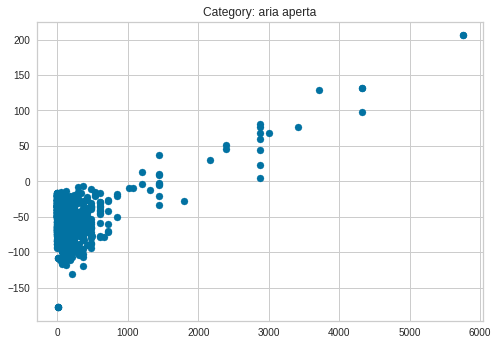

Data dimension: (792, 1624)


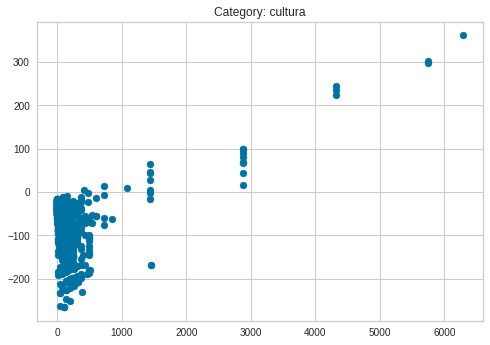

Data dimension: (1191, 2082)


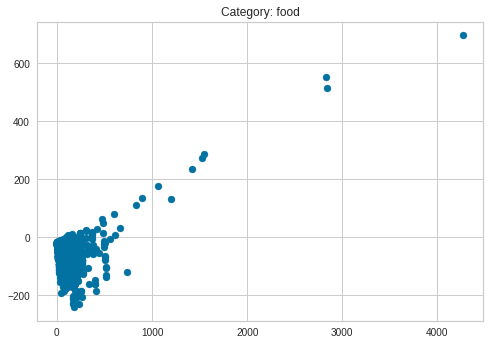

Data dimension: (326, 666)


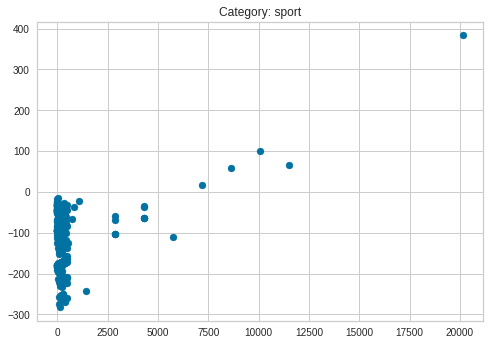

Data dimension: (522, 962)


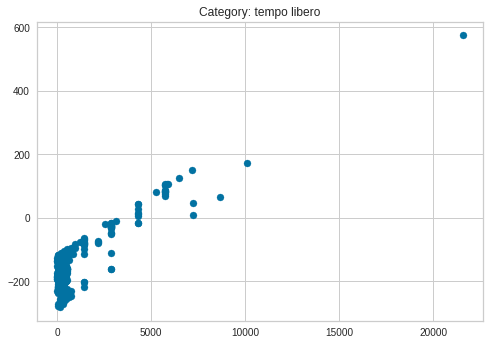

Data dimension: (934, 2119)


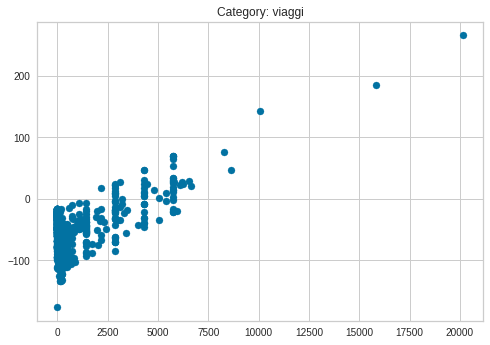

In [ ]:
svd_dict_tfidf = plot_with_SVD(X, categories, tfidf_dict)

In [ ]:
svd_dict_embeddings = plot_with_SVD(X, categories, embeddings)

NameError: ignored

In [ ]:
#Plot results
def plotKMeans(label:np.ndarray, df:pd.DataFrame, category:str):
  u_labels = np.unique(label)
  for i in u_labels:
      plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
  plt.title('K-means with {} clusters for {}'.format(len(u_labels), category))
  plt.legend()
  plt.show()

In [ ]:
def kmeans_tests(data:pd.DataFrame, category:str, svd_dict:dict, clusters_number:int=10, steps:int=1):
  inertia = []
  times = dict() #{k:time_needed}
  K = range(2,clusters_number,steps) 
  for k in K:
      #Fit 
      start = time.time()
      kmeanModel = KMeans(n_clusters=k)
      kmeans = kmeanModel.fit(data)
      time_needed = time.time() - start
      times[k] = time_needed
      #Elbow
      inertia.append(kmeanModel.inertia_)
      #Clusters
      label = kmeans.predict(data)
      plotKMeans(label, svd_dict[category], category)
  return inertia, times, K

In [ ]:
def elbow_and_statistics(inertia:list, times:dict, K:list):
  #Elbow
  plt.figure(figsize=(10,3))
  plt.plot(K, inertia, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method showing the optimal k')
  plt.show()
  print("\n")
  #Inertia
  for k,value in zip(K, inertia):
    print("Inertia for {} clusters is: {}".format(k,value))
  print("\n")
  #Times needed
  for k,v in times.items():
    print("Time needed to fit kmeans with {} clusters is: {}".format(k,v))

In [ ]:
def elbow_visualizer(data:pd.DataFrame, k:int):
  model = KMeans()
  visualizer = KElbowVisualizer(model, k=k)
  visualizer.fit(data)        
  visualizer.show() 

In [ ]:
def kmeans_computation(data:pd.DataFrame, description_dict:dict, categories:list, svd:dict, k:int, visualizer:bool=False):
  assert type(categories)==list, "Expected list as input not {}".format(type(categories))
  for c in categories:
    print("Category: {}".format(c))
    data_category = data[data[c]!=0]
    descriptions_encodings = pd.DataFrame(description_dict[c], index=data_category.index)
    data_category.drop(columns=categories, inplace=True)
    data_with_encodings = pd.concat([data_category, descriptions_encodings], axis=1, ignore_index=True)
    if visualizer:
      #kmeans
      inertia, times, K = kmeans_tests(data_with_encodings, c, svd, k)
      # Elbow and inertia
      elbow_and_statistics(inertia, times, K)
    else:
      elbow_visualizer(data_with_encodings, k)  

Category: aria aperta


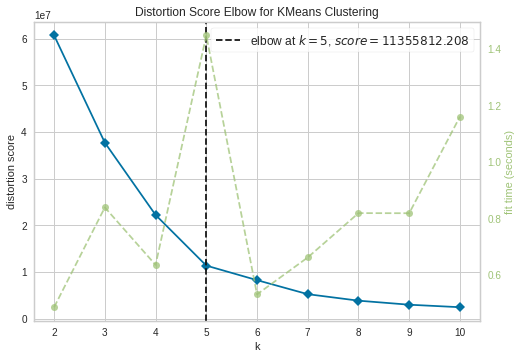

Category: cultura


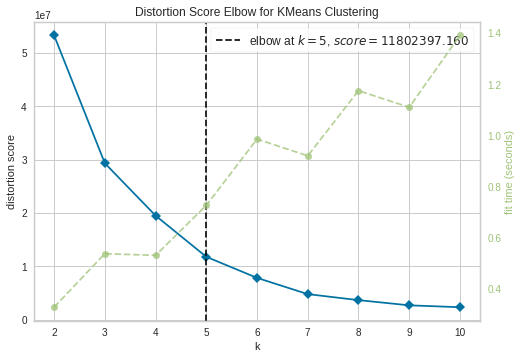

Category: food


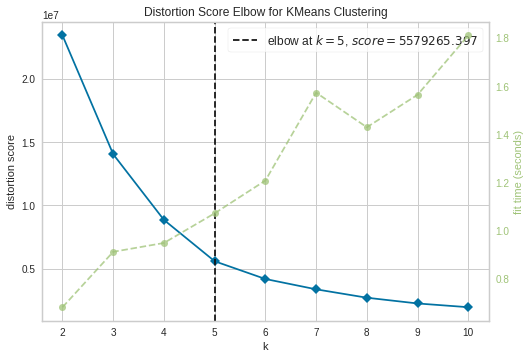

Category: sport


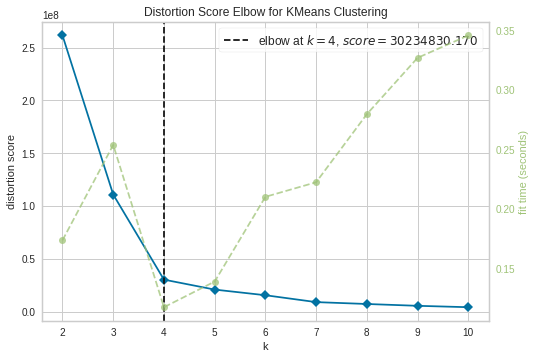

Category: tempo libero


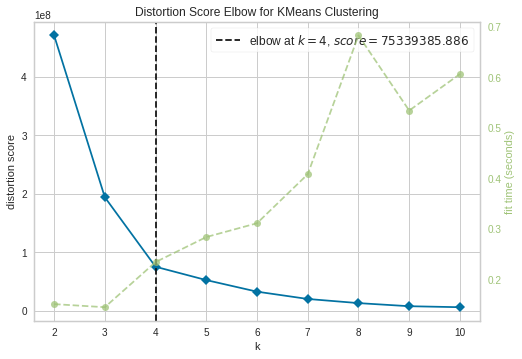

Category: viaggi


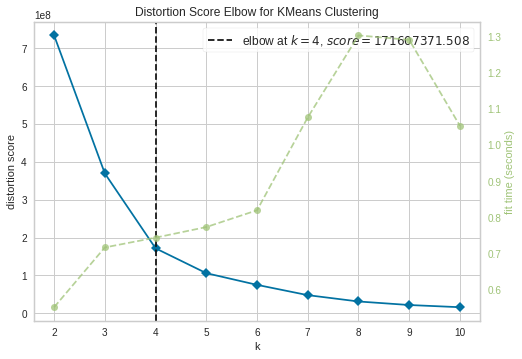

In [ ]:
#kmeans_computation(["food"])
kmeans_computation(X, tfidf_dict, categories, svd_dict_tfidf, 10)

In [ ]:
#kmeans_computation(["food"])
kmeans_computation(X, embeddings, categories, svd_dict_embeddings, 10)

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from collections import Counter

In [ ]:
def plot_dbscan(data:pd.DataFrame, labels:np.ndarray, core_samples_mask:np.ndarray, n_clusters_:int):  
  unique_labels = set(labels)
  colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
  for k, col in zip(unique_labels, colors):
      if k == -1:
          # Black used for noise.
          col = [0, 0, 0, 1]

      data_array = data.to_numpy()
      class_member_mask = labels == k
      xy = data_array[class_member_mask & core_samples_mask]
      plt.plot(
          xy[:, 0],
          xy[:, 1],
          "o",
          markerfacecolor=tuple(col),
          markeredgecolor="k",
          markersize=14,
      )

      xy = data_array[class_member_mask & ~core_samples_mask]
      plt.plot(
          xy[:, 0],
          xy[:, 1],
          "o",
          markerfacecolor=tuple(col),
          markeredgecolor="k",
          markersize=6,
      )

  plt.title("Estimated number of clusters: %d" % n_clusters_)
  plt.show()

In [ ]:
def DBSCAN_categories(data:pd.DataFrame, categories:list, description_dict:dict, plot:bool=False):
  dbscan_dict = dict()
  for c in categories:
    data_category = data[data[c]!=0]
    descriptions_encodings = pd.DataFrame(description_dict[c], index=data_category.index)
    data_category.drop(columns=categories, inplace=True)
    data_with_encodings = pd.concat([data_category, descriptions_encodings], axis=1, ignore_index=True)
    clustering = DBSCAN(eps=10, min_samples=10).fit(data_with_encodings)
    dbscan_dict[c] = clustering
    labels = clustering.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    counter = Counter(labels)
    counter = dict(sorted(counter.items(), key=lambda item: item[1], reverse=True))
    print("Category '{}' has {} clusters and {} noisy points\nDistribution of the samples in the clusters: {}\n".format(c, n_clusters_, n_noise_, counter))
    if plot:
      core_samples_mask = np.zeros_like(labels, dtype=bool)
      core_samples_mask[clustering.core_sample_indices_] = True
      plot_dbscan(data_with_encodings, labels, core_samples_mask, n_clusters_)
  return dbscan_dict

In [ ]:
dbscan_tfidf = DBSCAN_categories(X, categories, tfidf_dict, plot=True)

In [ ]:
dbscan_embeddings = DBSCAN_categories(X, categories, embeddings, plot=True)

### GMM

In [ ]:
def plot_GMM(gmm, data:pd.DataFrame):
  data_array = data.to_numpy()
  gmm_labels = gmm.predict(data_array)
  plt.scatter(data_array[:,0], data_array[:,1], c=gmm_labels, cmap='rainbow')
  plt.axis('equal')
  plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture

def GMM_categories(data:pd.DataFrame, categories:list, description_dict:dict, plot:bool=False):
  gmm_dict = dict()
  for c in categories:
    data_category = data[data[c]!=0]
    descriptions_encodings = pd.DataFrame(description_dict[c], index=data_category.index)
    data_category.drop(columns=categories, inplace=True)
    data_with_encodings = pd.concat([data_category, descriptions_encodings], axis=1, ignore_index=True)
    gmm = GaussianMixture(n_components=5, random_state=42).fit(data_with_encodings)
    gmm_dict[c] = gmm
    print("Plot of clusters for class {}".format(c))
    #plot_gmm(gmm, data_with_tfidf)
    plot_GMM(gmm, data_with_encodings)
    #plot_results(data_with_tfidf, gmm.predict(data_with_tfidf), gmm.means_, gmm.covariances_, 0, "Class {}".format(c))
  return gmm_dict

In [ ]:
GMM_categories(X, categories, tfidf_dict, plot=True)

In [ ]:
GMM_categories(X, categories, embeddings, plot=True)

### UMAP + HDBSCAN

In [ ]:
!pip install hdbscan
!pip install umap-learn

     |████████████████████████████████| 5.2 MB 9.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330765 sha256=46f218114aa28096ea2c58d62ffcaac4186bb7d13efc6a6c3de4b2a748e345bb
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan
     |████████████████████████████████| 88 kB 4.6 MB/s 
     |████████████████████████████████| 1.1 MB 22.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=8f10ffd8b761adc53cb95a5972cd77bf67721f9a47ccc3af98d6a5ccb4a6fdb5
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=7d4b6cec717638e9c8122b4dde28e9afa7d50d82fdf

In [ ]:
import hdbscan
import umap.umap_ as umap

In [ ]:
def plot_clusters(embeddings, clusters, n_neighbors=15, min_dist=0.1):
    """
    Reduce dimensionality of best clusters and plot in 2D

    Arguments:
        embeddings: embeddings to use
        clusteres: HDBSCAN object of clusters
        n_neighbors: float, UMAP hyperparameter n_neighbors
        min_dist: float, UMAP hyperparameter min_dist for effective
                  minimum distance between embedded points

    """
    umap_data = umap.UMAP(n_neighbors=n_neighbors, 
                          n_components=2, 
                          min_dist = min_dist,  
                          #metric='cosine',
                          random_state=42).fit_transform(embeddings)

    point_size = 100.0 / np.sqrt(embeddings.shape[0])
    
    result = pd.DataFrame(umap_data, columns=['x', 'y'])
    result['labels'] = clusters.labels_

    fig, ax = plt.subplots(figsize=(14, 8))
    outliers = result[result.labels == -1]
    clustered = result[result.labels != -1]
    plt.scatter(outliers.x, outliers.y, color = 'lightgrey', s=point_size)
    plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=point_size, cmap='jet')
    plt.colorbar()
    plt.show()

In [ ]:
def score_clusters(clusters, prob_threshold = 0.05):
    """
    Returns the label count and cost of a given clustering

    Arguments:
        clusters: HDBSCAN clustering object
        prob_threshold: float, probability threshold to use for deciding
                        what cluster labels are considered low confidence

    Returns:
        label_count: int, number of unique cluster labels, including noise
        cost: float, fraction of data points whose cluster assignment has
              a probability below cutoff threshold
    """
    
    cluster_labels = clusters.labels_
    label_count = len(np.unique(cluster_labels))
    total_num = len(clusters.labels_)
    cost = (np.count_nonzero(clusters.probabilities_ < prob_threshold)/total_num)
    
    return label_count, cost

In [ ]:
def generate_clusters(message_embeddings,
                      n_neighbors,
                      n_components, 
                      min_cluster_size,
                      min_samples = None,
                      random_state = None):
    """
    Returns HDBSCAN objects after first performing dimensionality reduction using UMAP
    
    Arguments:
        message_embeddings: embeddings to use
        n_neighbors: int, UMAP hyperparameter n_neighbors
        n_components: int, UMAP hyperparameter n_components
        min_cluster_size: int, HDBSCAN hyperparameter min_cluster_size
        min_samples: int, HDBSCAN hyperparameter min_samples
        random_state: int, random seed
        
    Returns:
        clusters: HDBSCAN object of clusters
    """
    
    umap_embeddings = (umap.UMAP(n_neighbors = n_neighbors, 
                                n_components = n_components, 
                                metric = 'cosine', 
                                random_state=random_state)
                            .fit_transform(message_embeddings))

    clusters = hdbscan.HDBSCAN(min_cluster_size = min_cluster_size, 
                               min_samples = min_samples,
                               metric='euclidean', 
                               gen_min_span_tree=True,
                               cluster_selection_method='eom').fit(umap_embeddings)
    
    return clusters

In [ ]:
#IT DOESN NOT WORK WITH TRANSFORMER'S EMBEDDINGS
def compute_hdbscan_dict(embeddings, categories): 
  hdbscan_clusters = dict()
  for c in categories:
    print("Clustering category '{}'".format(c))
    try:
      # embeddings_cpu = torch.Tensor(len(embeddings[c]), 768)
      # embeddings_cpu = torch.cat(embeddings[c], dim=0)
      # embeddings_cpu = b.cpu()
      hdbscan_clusters[c] = generate_clusters(embeddings[c],
                                              n_neighbors = 15, 
                                              n_components = 5, 
                                              min_cluster_size = 10,
                                              random_state=42)
      labels_def, cost_def = score_clusters(hdbscan_clusters[c])
      print("Number of labels: {}".format(labels_def))
      print("Cost: {}".format(cost_def))
      plot_clusters(embeddings[c],
                    hdbscan_clusters[c],
                    n_neighbors = 15,
                    min_dist = 0.1)
    except Exception as e:
      print("---> Cannot cluster category '{}' because of error:\n{}".format(c, e))
      #continue
    print()
  return hdbscan_clusters

Clustering category 'aria aperta'
Number of labels: 16
Cost: 0.3902439024390244


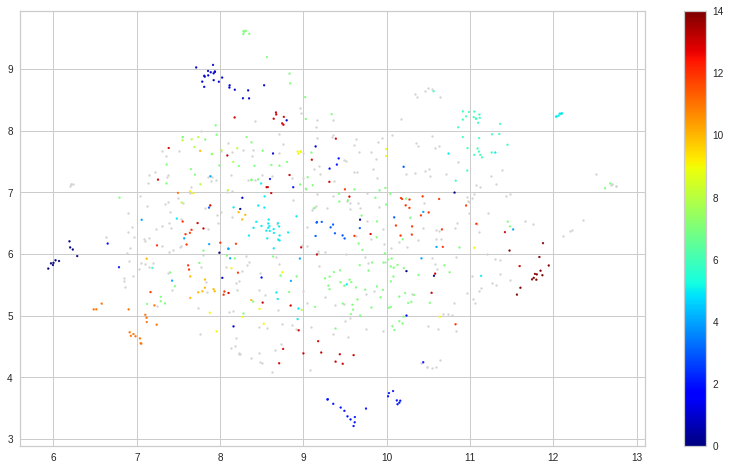


Clustering category 'cultura'
Number of labels: 22
Cost: 0.4595959595959596


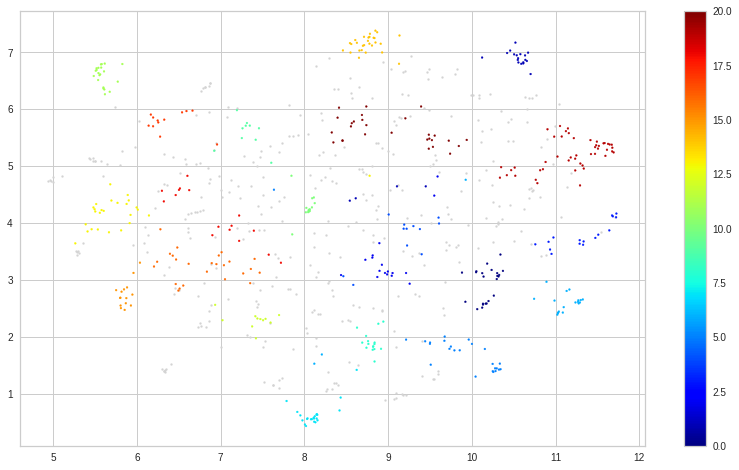


Clustering category 'food'
Number of labels: 2
Cost: 0.0


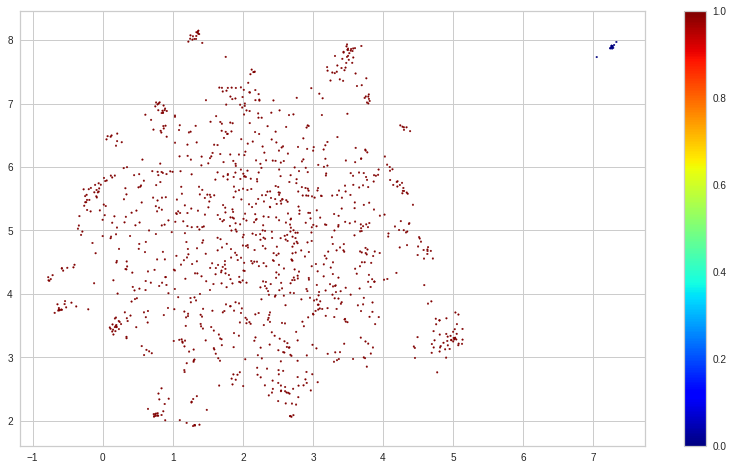


Clustering category 'sport'
Number of labels: 8
Cost: 0.24846625766871167


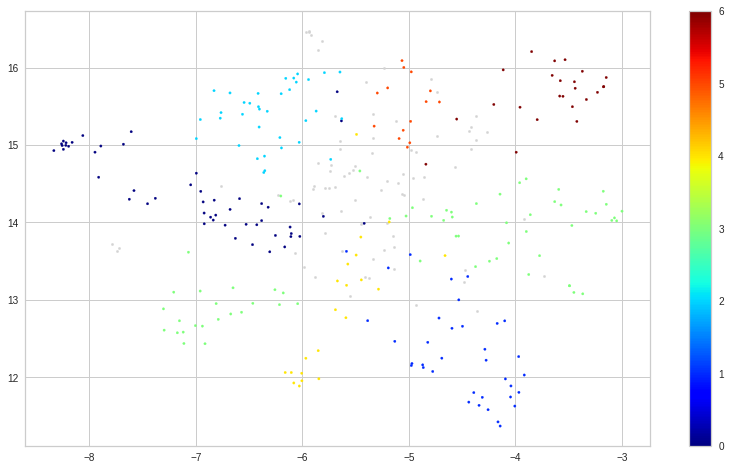


Clustering category 'tempo libero'
Number of labels: 12
Cost: 0.5421455938697318


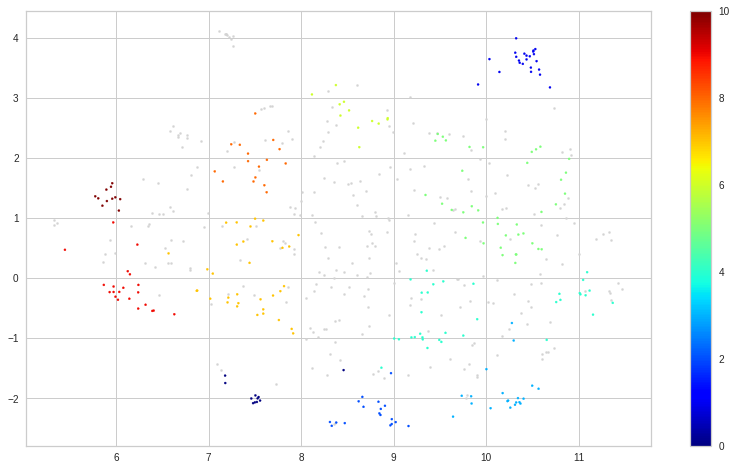


Clustering category 'viaggi'
Number of labels: 26
Cost: 0.3265524625267666


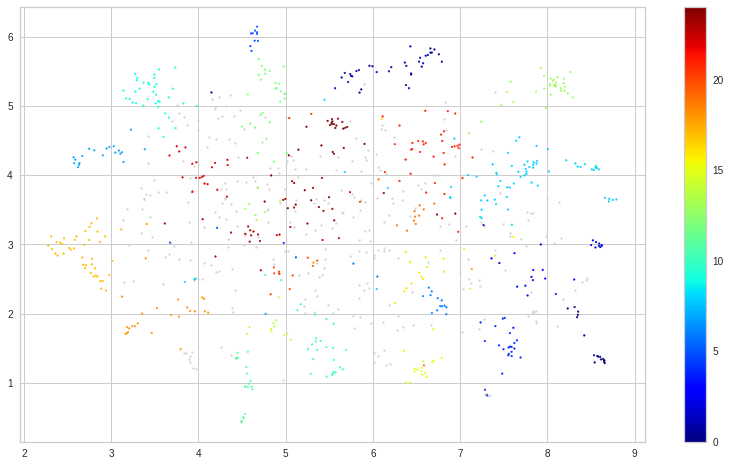

In [ ]:
hdbscan_dict = compute_hdbscan_dict(tfidf_dict, categories)

### RS

In [ ]:
optimal_number_clusters = {"aria aperta":4, "cultura":4, "food":4, "sport":4, "tempo libero":4, "viaggi":4}
#optimal_number_clusters = {"aria aperta":7, "cultura":7, "food":7, "sport":7, "tempo libero":7, "viaggi":7}
#optimal_number_clusters = {"aria aperta":10, "cultura":10, "food":10, "sport":10, "tempo libero":10, "viaggi":10}

In [ ]:
# Return list of ranking for clusters ordered in ascending manner by number of posts
# the list has in i-th position the ranking of the i-th cluster 
def rank_clusters_in_categories(counts:pd.DataFrame, 
                                category:str):
  counts.sort_values(inplace=True)
  ordered_clusters = [x[0] for x in counts.index]
  ranking = [0 for x in ordered_clusters]
  for idx, r in enumerate(ordered_clusters):
    ranking[r] = idx + 1
  return ranking

# Compute the clusters for each category
def compute_clusters(data:pd.DataFrame, optimal_number_clusters:dict, description_dict:dict):
  kmeans_dict = dict()
  ranking_clusters_per_category = dict()
  for k,v in optimal_number_clusters.items():
    kmeanModel = KMeans(n_clusters=v)
    print("Category '{}' has {} clusters".format(k,v))
    data_category = data[data[k]!=0]
    descriptions_encodings = pd.DataFrame(description_dict[k], index=data_category.index)
    data_category.drop(columns=categories, inplace=True)
    data_with_encodings = pd.concat([data_category, descriptions_encodings], axis=1, ignore_index=True)

    kmeans = kmeanModel.fit(data_with_encodings.values)
    kmeans_dict[k] = kmeans
    #print number of posts in each cluster
    labels = kmeans.labels_
    count_elem_per_cluster = pd.DataFrame(labels).value_counts()
    ranking_clusters_per_category[k] = rank_clusters_in_categories(count_elem_per_cluster, k)
    print(count_elem_per_cluster)
    print()
  #print(ranking_clusters_per_category)
  return kmeans_dict, ranking_clusters_per_category

In [ ]:
kmeans_tfidf_dict, ranking_clusters_per_category_tfidf = compute_clusters(X, optimal_number_clusters, tfidf_dict)

Category 'aria aperta' has 4 clusters
2      5
1     14
3     81
0    638
dtype: int64

Category 'cultura' has 4 clusters
2      6
1      8
3     11
0    767
dtype: int64

Category 'food' has 4 clusters
1      3
3      9
0    536
2    643
dtype: int64

Category 'sport' has 4 clusters
3      1
1      4
2     11
0    310
dtype: int64

Category 'tempo libero' has 4 clusters
2      1
3     19
1     32
0    470
dtype: int64

Category 'viaggi' has 4 clusters
3      2
1     56
2     90
0    786
dtype: int64



In [ ]:
print(ranking_clusters_per_category_tfidf)

{'aria aperta': [4, 2, 1, 3], 'cultura': [4, 2, 1, 3], 'food': [3, 1, 4, 2], 'sport': [4, 2, 3, 1], 'tempo libero': [4, 3, 1, 2], 'viaggi': [4, 2, 3, 1]}


In [ ]:
kmeans_embeddings_dict, ranking_clusters_per_category_embeddings = compute_clusters(X, optimal_number_clusters, embeddings)

NameError: ignored

In [ ]:
print(ranking_clusters_per_category_embeddings)

NameError: ignored


The distance between two user is computed in the following way: 

1.   for each category, the distance between two users is computed as the sum of the differences in numbers of posts in each cluster weighted by the importance of each cluster in the category (a cluster with less posts weights more) and by the total number of posts of the two users;
2.   the total distance is computed using the following formula: distance = $∑_{c=1}^r \frac{d[c]}{\log_2(rank(c)+1)}$, where d is a list of distances per category computed in the previous step and rank(c) is the ranking of the category c for the target user (the ranking depends on the number of posts, i.e. the first post in the ranking is the category that has the highest number of posts)

In [ ]:
from itertools import groupby
import math

# Used in the heap
def get_similarity(t:tuple):
  return t[1]

# get the ranking of the categories for the target user 
# the first category is the one with more posts
# return: list of tuples (category, #posts)
def ranking_target(target_categories:dict):
  scores_clusters = [(cat, len(s)) for cat, cluster in target_categories.items() \
                     for s in cluster.values()]
  scores_categories = []
  for i, g in groupby(sorted(scores_clusters), key=lambda x: x[0]):
      scores_categories.append([i, sum(v[1] for v in g)])
  scores_categories.sort(key=lambda x: x[1], reverse=True)
  #print(scores_categories)
  return scores_categories

# retrieve the score for a certain category
def get_score_category(ranking:list, 
                       category:str):
  score = 0
  for r in ranking:
    if r[0] == category:
      score = r[1]
  return score

# retrieve ranking of a category
def get_ranking_category(ranking:list, 
                         category:str):
  for i,r in enumerate(ranking):
    if r[0] == category:
      return i+1
  #category not in ranking -> target user has not posted in such category
  return (len(ranking))

# compute the distance between two users, given a category and the ranking of the clusters for such category
def get_cluster_distance(user_clusters:dict, 
                         target_clusters:dict, 
                         ranking:list):
  distance = 0
  if not target_clusters: #target has no clusters for this category
    distance = sum([len(cluster) for cluster in user_clusters.values()])
  elif not user_clusters:
    distance = sum([len(cluster) for cluster in target_clusters.values()])
  else:
    #take all the clusters names
    target_keys_set = set(target_clusters.keys())
    user_keys_set = set(user_clusters.keys())
    keys_set = target_keys_set | user_keys_set
    #compute distance for each cluster of the category and update total distance
    for k in keys_set:
      target_clusters_k = 0
      user_clusters_k = 0
      if k in target_keys_set:
        target_clusters_k = len(target_clusters[k])
      if k in user_keys_set:
        user_clusters_k = len(user_clusters[k])
      #distance is divided by the total number of posts and the logarith of the ranking of the cluster
      distance += abs(user_clusters_k-target_clusters_k)/((user_clusters_k+target_clusters_k)*math.log2(ranking[k]+1))
  return distance

# Compute the distance between the target user and all the other users
# and return the most similar ones (the number can be specified using top) 
def distance(target_user:int, 
             partitions_users:dict,
             ranking_clusters_per_category:dict, 
             top:int=5):
  if target_user not in partitions_users:
    print("This ({}) user does not exist".format(target_user))
    return
  heap = []
  heapq.heapify(heap)
  #get the ranking of the categories for the user
  ranking = ranking_target(partitions_users[target_user])
  for user,partitions in partitions_users.items():
    if user == target_user:
      continue 
    distance = 0
    for c in categories:
      #target_category_score = get_score_category(ranking, c)
      ranking_clusters = ranking_clusters_per_category[c]
      target_category_ranking = get_ranking_category(ranking, c)
      user_category_clusters = {}
      if c in partitions:
        user_category_clusters = partitions[c]
      # check if target user has clusters for this category
      target_category_clusters = {} 
      if c in partitions_users[target_user]:
        target_category_clusters = partitions_users[target_user][c]
      #compute distance for the actual category and update total distance
      distance_category = get_cluster_distance(user_category_clusters,
                                               target_category_clusters,
                                               ranking_clusters)
      distance += distance_category / math.log2(target_category_ranking + 1)#* (len(categories)-target_category_ranking)
      #push in the heap
    heapq.heappush(heap, (user, distance))
  return heapq.nsmallest(top, heap, key=get_similarity) 

In [ ]:
def print_posts_user(user:int):
  print("Posts for user {}:".format(user))
  try:
    posts = df_schede[df_schede["userId"]==user]
  except:
    print("User does not exist")
  for _, p in posts.iterrows():
    print(p.description)
    print("-"*100)

def print_info_for_user(user:int, 
                        partition:dict):
  if user not in partition:
    print("This user does not exist")
    return
  print("Info about the clusters for the posts of user {}".format(user))
  partitions_categories = partition[user]
  for category,partitions in partitions_categories.items():
    print("Clusters for category {}: {}".format(category, len(partitions)))
    for cluster,array in partitions.items():
      print("#items in cluster {} for category {}: {}".format(cluster, category, len(array)))
    print()    

#### Considering posts users wrote

In [ ]:
target_id = 129

In [ ]:
# Compute the distribution of the posts in the clusters for each user
# partitions = {user1: {c0:[post12, post45], c1:[post1], c2:[post5]}, user2:{c0:[], c1:[]}, etc}
def posts_in_partition(data:pd.DataFrame, 
                       categories:list, 
                       kmeans_dict:dict,
                       description_dict:dict):
  partitions = dict()
  #build one category at a time
  for c in categories:
    data_category = data[data[c]!=0]
    descriptions_encodings = pd.DataFrame(description_dict[c], index=data_category.index)
    data_category.drop(columns=categories, inplace=True)
    users = data_category["userId"]
    posts_ids = data_category["id"]
    data_post = pd.concat([data_category, descriptions_encodings], axis=1, ignore_index=True)
    #remove userId and posts' ids
    data_post = data_post.iloc[: , 2:] 
    # add posts to the partitions
    for u,p,d in zip(users, posts_ids, data_post.iterrows()):
      user = u
      post = p
      features = d[1]
      cluster = kmeans_dict[c].predict([features.values])[0]
      if user in partitions:
          #check if category c already exists for userId
          if c in partitions[user]:
            #check if cluster already exists for the category c of userId
            if cluster in partitions[user][c]:
              partitions[user][c][cluster].append(post)
            else:
              partitions[user][c][cluster] = [post]
          else:
            partitions[user][c] = dict()
            partitions[user][c][cluster] = [post]
      else:
        partitions[user] = dict()
        partitions[user][c] = dict()
        partitions[user][c][cluster] = [post]
  return partitions

In [ ]:
# partitions_by_user = posts_in_partition(data_with_ids,
#                                         categories,
#                                         kmeans_embeddings_dict,
#                                         embeddings)

In [ ]:
partitions_by_user = posts_in_partition(data_with_ids,
                                        categories,
                                        kmeans_tfidf_dict,
                                        tfidf_dict)

In [ ]:
print_info_for_user(target_id, partitions_by_user)

Info about the clusters for the posts of user 129
Clusters for category cultura: 1
#items in cluster 0 for category cultura: 10

Clusters for category food: 3
#items in cluster 0 for category food: 16
#items in cluster 3 for category food: 1
#items in cluster 2 for category food: 4

Clusters for category sport: 1
#items in cluster 0 for category sport: 6

Clusters for category tempo libero: 3
#items in cluster 0 for category tempo libero: 11
#items in cluster 1 for category tempo libero: 1
#items in cluster 3 for category tempo libero: 1

Clusters for category viaggi: 1
#items in cluster 0 for category viaggi: 2



In [ ]:
#print_posts_user(target_id)

In [ ]:
# best_users_from_posts = distance(target_id, partitions_by_user, ranking_clusters_per_category_embeddings)
# best_users_from_posts

In [ ]:
best_users_from_posts = distance(target_id, partitions_by_user, ranking_clusters_per_category_tfidf)
best_users_from_posts

[(176, 1.4152406506696693),
 (268, 1.988384796507122),
 (468, 2.734845464253692),
 (314, 2.768206398954486),
 (228, 2.8216013118983665)]

In [ ]:
for u in best_users_from_posts:
  print_info_for_user(u[0], partitions_by_user)
  print("-"*100)

Info about the clusters for the posts of user 176
Clusters for category cultura: 1
#items in cluster 0 for category cultura: 6

Clusters for category food: 2
#items in cluster 2 for category food: 3
#items in cluster 0 for category food: 3

Clusters for category sport: 1
#items in cluster 0 for category sport: 3

Clusters for category tempo libero: 3
#items in cluster 0 for category tempo libero: 9
#items in cluster 1 for category tempo libero: 2
#items in cluster 3 for category tempo libero: 2

Clusters for category viaggi: 1
#items in cluster 0 for category viaggi: 2

----------------------------------------------------------------------------------------------------
Info about the clusters for the posts of user 268
Clusters for category cultura: 1
#items in cluster 0 for category cultura: 13

Clusters for category food: 2
#items in cluster 0 for category food: 7
#items in cluster 2 for category food: 1

Clusters for category sport: 1
#items in cluster 0 for category sport: 1

Cluste

#### Considering the posts the users liked

In [ ]:
target_id = 129

In [ ]:
# Compute distribution of the likes in the clusters for each user
# partitions = {user1: {c0:[like1, like4], c1:[like6], c2:[like3]}, user2:{c0:[], c1:[]}, etc}
def likes_in_partition(data:pd.DataFrame, 
                       categories:list, 
                       kmeans_dict:dict,
                       description_dict:dict):
  partitions = dict()
  #build one category at a time
  for c in categories:
    data_category = data[data[c]!=0]
    descriptions_encodings = pd.DataFrame(description_dict[c], index=data_category.index)
    data_category.drop(columns=categories, inplace=True)
    posts_ids = data_category["id"]
    data_post = pd.concat([data_category, descriptions_encodings], axis=1, ignore_index=True)
    #remove userId and posts' ids
    data_post = data_post.iloc[: , 2:] 
    for p,d in zip(posts_ids, data_post.iterrows()):
      post = p
      try:
        users_list = posts_with_likes.at[p] #error if p is not in posts_with_likes
      except:
        # no one liked the post -> skip it
        continue
      features = d[1]
      cluster = kmeans_dict[c].predict([features.values])[0]
      for user in users_list:
        if user in partitions:
            #check if category c already exists for userId
            if c in partitions[user]:
              #check if cluster already exists for the category c of userId
              if cluster in partitions[user][c]:
                partitions[user][c][cluster].append(post)
              else:
                partitions[user][c][cluster] = [post]
            else:
              partitions[user][c] = dict()
              partitions[user][c][cluster] = [post]
        else:
          partitions[user] = dict()
          partitions[user][c] = dict()
          partitions[user][c][cluster] = [post]
  return partitions

In [ ]:
# partitions_by_user_likes = likes_in_partition(data_with_ids,
#                                         categories,
#                                         kmeans_embeddings_dict,
#                                         embeddings)

In [ ]:
partitions_by_user_likes = likes_in_partition(data_with_ids,
                                        categories,
                                        kmeans_tfidf_dict,
                                        tfidf_dict)

In [ ]:
print_info_for_user(target_id, partitions_by_user_likes)

Info about the clusters for the posts of user 129
Clusters for category aria aperta: 2
#items in cluster 0 for category aria aperta: 4
#items in cluster 1 for category aria aperta: 1

Clusters for category cultura: 1
#items in cluster 0 for category cultura: 5

Clusters for category food: 2
#items in cluster 2 for category food: 2
#items in cluster 0 for category food: 4

Clusters for category sport: 1
#items in cluster 0 for category sport: 1

Clusters for category tempo libero: 2
#items in cluster 0 for category tempo libero: 4
#items in cluster 1 for category tempo libero: 1

Clusters for category viaggi: 3
#items in cluster 0 for category viaggi: 3
#items in cluster 2 for category viaggi: 1
#items in cluster 1 for category viaggi: 1



In [ ]:
print_posts_user(target_id)

Posts for user 129:
Otranto, in Puglia, vanta il primato italiano di città più ad est dello stivale. Ad esso assegnerei un ulteriore riconoscimento relativo alle spiagge chiarissime, il mare limpido e la cultura e l’arte del luogo.
Storicamente fu un punto strategico di commercio, ma questo la rendeva ulteriormente vulnerabile a tutti gli attacchi provenienti da tutto l’Adriatico. Otranto è per questo una ex città fortificata con un borgo antico ancora circondato dalle mura perimetrali, robuste torri e un imponente castello.

Oltre alla antica storia, Otranto offre moltissimo dal punto di vista turistico. Molti sono i locali, i ristoranti vista mare e le passeggiate lungo il porto. 
Ma le bellezze di Otranto non finiscono qui, molto vicino alla città potrete trovare moltissimi scenari naturali, spiagge e mare impareggiabile.

Ecco per me le spiagge imperdibili:
📍Baia dei Turchi, che prende il suo nome dalla leggenda che racconta che qui sbarcarono i famigerati soldati Ottomani. La spia

In [ ]:
# best_users_from_likes = distance(target_id, partitions_by_user_likes, ranking_clusters_per_category_embeddings)
# best_users_from_likes

In [ ]:
best_users_from_likes = distance(target_id, partitions_by_user_likes, ranking_clusters_per_category_tfidf)
best_users_from_likes

[(553, 1.4014681160222087),
 (399, 1.7050770389057588),
 (435, 1.751489311585733),
 (150, 1.8299291102865356),
 (181, 1.9908641313325464)]

In [ ]:
for u in best_users_from_likes:
  print_info_for_user(u[0], partitions_by_user)
  print("-"*100)

Info about the clusters for the posts of user 553
Clusters for category aria aperta: 1
#items in cluster 0 for category aria aperta: 9

Clusters for category cultura: 1
#items in cluster 0 for category cultura: 4

Clusters for category sport: 1
#items in cluster 0 for category sport: 2

Clusters for category viaggi: 1
#items in cluster 0 for category viaggi: 1

----------------------------------------------------------------------------------------------------
Info about the clusters for the posts of user 399
Clusters for category aria aperta: 4
#items in cluster 3 for category aria aperta: 3
#items in cluster 1 for category aria aperta: 1
#items in cluster 2 for category aria aperta: 1
#items in cluster 0 for category aria aperta: 6

Clusters for category cultura: 1
#items in cluster 0 for category cultura: 14

Clusters for category food: 2
#items in cluster 0 for category food: 1
#items in cluster 2 for category food: 1

Clusters for category sport: 1
#items in cluster 0 for category

#### Show recommendations

In [ ]:
def print_single_result(data:pd.DataFrame, 
                        recommended_user):
  assert type(recommended_user) == tuple, "Use print_results for multiple users"
  posts = data[data["userId"]==recommended_user[0]]
  print("User: {}".format(recommended_user[0]))
  for _, p in posts.iterrows():
    print("Post:")
    print(p.description)
  print("-"*100)

def print_results(data:pd.DataFrame, 
                  recommended_users):
  assert type(recommended_users)==list, "Use print_single_result for single user"
  for u in recommended_users:
    posts = data[data["userId"]==u[0]]
    print("User: {}".format(u[0]))
    for _, p in posts.iterrows():
      print("Post:")
      print(p.description)
    print("-"*100)

In [ ]:
#print_single_result(df_schede, best_users_from_posts[0])

In [ ]:
#print_results(df_schede, best_users_from_posts)

In [ ]:
#print_single_result(df_schede, best_users_from_likes[0])

In [ ]:
#print_results(df_schede, best_users_from_likes)

Choose the posts from the best users:


1.   Consider posts that most similar users liked
2.   Consider posts with more likes

1) Get the posts that most similar users liked and rank them considering the number of likes, weighted by importance of who liked the posts (likes from users that are in the recommendation lists are more important)

In [ ]:
# Consider posts that most similar users liked
# the score for a posts depends on the number of likes and the ranking of the users that liked it
def score_post(user_list:list, recommended_users:list):
  score = 0
  for u in user_list:
    rec_users = [x[0] for x in recommended_users]
    if u in rec_users:
      score += len(recommended_users) - rec_users.index(u) +1
    else:
      score += 1
  return score

def get_posts_similar_users_liked(data:pd.DataFrame, 
                                  users_with_likes:pd.DataFrame, 
                                  recommended_users:list):
  assert type(recommended_users)==list, "recommeded_users should be a list of users'ids"
  liked_posts = dict()
  for u in recommended_users:
    try:
      posts = users_with_likes.at[u[0]] #liked posts for u
      for id in posts:
        likes = posts_with_likes.at[id] #users who liked this post
        if id in liked_posts:
          # we already retrieve the likes for this post
          continue
        else:
          liked_posts[id] = (u[0], likes)
    except:
      print("User {} did not like any post".format(u[0]))
      #print("-"*100)
      continue
  posts_scores = []
  for p_id,l in liked_posts.items():
    posts_scores.append((l[0], p_id, score_post(l[1], recommended_users), len(l[1])))
  ranking = sorted(posts_scores, key=lambda tup: tup[2], reverse=True)
  #print("Number of recommended posts: {}\nRecommended posts: {}".format(len(ranking), ranking))
  for idx,t in enumerate(ranking):
    print("{})Post {} from user {} with {} likes and score {}".format(idx+1, t[1], t[0], t[3], t[2]))
    p = data[data["id"]==t[1]]
    print(p.description.values)
    print("-"*100)
  return ranking

In [ ]:
ranking_liked_posts = get_posts_similar_users_liked(df_schede, users_with_likes, best_users_from_posts)

User 228 did not like any post
1)Post 61c9994121c95d5d91092cc6 from user 176 with 3 likes and score 11
['“Che farai domani?”\n“Andrò a pranzo a Parigi “\nCOOOSAAAAA 😮\nEbbene sì, è possibile! Sarà sicuramente faticoso, ma la vista della Tour Eiffel ripagherà ogni fatica.\nParlando con una mia amica non sapeva cosa fare il giorno del suo compleanno e io le proposi un pranzo fuori, ma dove ? Vivendo a Roma i posti non mancano, ma volevamo qualcosa di particolare. Così le propongo un pranzo a Parigi. Andata e ritorno nella stessa giornata. \nAbbiamo controllato i voli e coincidevano perfettamente l’andata era la mattina molto presto alle 6:30 ed il ritorno alle 20:55. PERFETTO SI PARTE! \n\n🛫Preso il volto diretto per Parigi Beauvais atterriamo e prendiamo il pullman ( abbiamo acquistato precedentemente i biglietti online ) \nDiretto a Port Maillot ;Qui ci sono 2 opzioni\n• fare circa 3km a piedi, ma visto il poco tempo eviterei\n•🚇 meglio prendere la linea GIALLA1 in dir. CHÂTEAU DE VICE

2) Get the posts from the most similar users and rank them considering the number of likes, weighted by importance of who liked the posts (likes from users that are in the recommendation lists are more important)

In [ ]:
# Consider posts, from the recommended users, with more likes
def get_number_likes(post_likes:tuple):
  return post_likes[2]

# the score for a posts depends on the number of likes and the ranking of the users that liked it
def score_post(user_list:list, recommended_users:list):
  score = 0
  for u in user_list:
    if u in recommended_users:
      score += len(recommended_users) - recommended_users.index(u) +1
    else:
      score += 1
  return score

def get_posts_with_more_likes(data:pd.DataFrame, 
                              posts_with_likes:pd.DataFrame, 
                              recommended_users:list, 
                              top:int=10):
  assert type(recommended_users)==list, "recommeded_users should be a list of users'ids"
  heap = []
  heapq.heapify(heap)
  recommended_users_list = [u[0] for u in recommended_users]
  for u in recommended_users_list:
    try:
      posts = data[data["userId"]==u]
    except:
      print("User {} did not post anything".format(u))
      print("-"*100)
      continue
    #print("User: {}".format(u[0]))
    for _, p in posts.iterrows():
      id = p.id
      try:
        users_likes = posts_with_likes.at[id]
        number_of_likes = len(users_likes)
        score_likes = score_post(users_likes, recommended_users_list)
      except:
        #print("Post {} has no likes".format(id))
        continue
      heapq.heappush(heap, (u, id, score_likes, number_of_likes))
  top_list = heapq.nlargest(top, heap, key=get_number_likes) 
  #print best
  for idx,t in enumerate(top_list):
    print("{})Post {} from user {} with {} likes and score {}".format(idx+1, t[1], t[0], t[3], t[2]))
    p = data[data["id"]==t[1]]
    print(p.description.values)
    print("-"*100)
  return top_list

In [ ]:
ranking_posts = get_posts_with_more_likes(df_schede, posts_with_likes, best_users_from_posts)

1)Post 61a9d9157e9cec6a98498cfa from user 468 with 2 likes and score 7
['Billund è una piccola cittadina Danese nella penisola dello Jutland famosa per essere la città nativa dei Lego. Se, come me, sei un amante dei mattoncini ti consiglio davvero di andare a visitarla. \n\nLegoland è il parco giochi a tema lego dove puoi trovare tantissime attrazioni. Dalle montagne russe ad un parco interno con la riproduzione di alcune città con i mattoncini (stile Italia in miniatura). Principalmente sono attrazioni per bambini, ma se non sei un amante della pura adrenalina è divertente anche in età adulta. All’interno c’è il lego store più importante al mondo dove si possono trovare uscite esclusive, anticipazioni mondiali ed è anche l’unico negozio al mondo dove poter comprare i mattoncini al peso. Inoltre, per i più appassionati, c’è anche la possibilità di pernottare nell’hotel del parco, dove non mancano sculture e giochi in lego sia nell’area comune che nelle stanze private.\n\nInsomma un’esp

In [ ]:
ranking_liked_posts[0]
#ranking_posts

(176, '61c9994121c95d5d91092cc6', 11, 3)

In [ ]:
def hybrid_recommender(data, *recommended_posts_lists):
  recommendations = []
  for r in recommended_posts_lists:
    recommendations += r[0]
  rec = sorted(recommendations, key=lambda tup: tup[2], reverse=True)
  for idx,t in enumerate(rec):
    print("{})Post {} from user {} with {} likes and score {}".format(idx+1, t[1], t[0], t[3], t[2]))
    p = data[data["id"]==t[1]]
    print(p.description.values)
    print("-"*100)
  return recommendations

In [ ]:
hybrid_ranking = hybrid_recommender(df_schede, (ranking_liked_posts, ranking_posts))

1)Post 61c9994121c95d5d91092cc6 from user 176 with 3 likes and score 11
['“Che farai domani?”\n“Andrò a pranzo a Parigi “\nCOOOSAAAAA 😮\nEbbene sì, è possibile! Sarà sicuramente faticoso, ma la vista della Tour Eiffel ripagherà ogni fatica.\nParlando con una mia amica non sapeva cosa fare il giorno del suo compleanno e io le proposi un pranzo fuori, ma dove ? Vivendo a Roma i posti non mancano, ma volevamo qualcosa di particolare. Così le propongo un pranzo a Parigi. Andata e ritorno nella stessa giornata. \nAbbiamo controllato i voli e coincidevano perfettamente l’andata era la mattina molto presto alle 6:30 ed il ritorno alle 20:55. PERFETTO SI PARTE! \n\n🛫Preso il volto diretto per Parigi Beauvais atterriamo e prendiamo il pullman ( abbiamo acquistato precedentemente i biglietti online ) \nDiretto a Port Maillot ;Qui ci sono 2 opzioni\n• fare circa 3km a piedi, ma visto il poco tempo eviterei\n•🚇 meglio prendere la linea GIALLA1 in dir. CHÂTEAU DE VICENNES e scendere a FRANKILN D.RO

## Method \#3

#### Neural Collaborative filtering

In [ ]:
R = pd.DataFrame(columns=posts.values, index= users.values)
R

In [ ]:
#Populate the rating matrix
for u in users_with_likes.index:
  posts = users_with_likes.loc[u]
  likes = dict()
  for p in posts:
    likes[p] = 1
  R.loc[u] = pd.Series(likes)

In [ ]:
R

In [ ]:
R.count().sum()

In [ ]:
R = R.reset_index()
R.rename(columns = {'index':'userId'}, inplace = True)
R

In [ ]:
split = int(0.8*R.shape[0])
split

In [ ]:
# Train
df_train = R.head(split)
print("non-null data:", df_train[df_train>0].count().sum())
#df_train

In [ ]:
# Test
test_split = R.shape[0] - split
df_test = R.tail(test_split)
print("non-null data:", df_test[df_test>0].count().sum())
#df_test